# Homework 3

### Problem 1.1
Get the data and mask off nans that we'll care about in future

In [1]:
from astropy.io import fits
import numpy as np

file = fits.open('./data/allStarLite-dr17-synspec_rev1.fits')
data = file[1].data
#file[1].columns

feh_raw = data['FE_H']
alpham_raw = data['ALPHA_M']
dist_raw = data['GAIAEDR3_R_MED_GEO']

mask = np.logical_or(np.isnan(feh_raw), np.isnan(alpham_raw), np.isnan(dist_raw))

feh = np.ma.masked_array(feh_raw, mask=mask)
alpham = np.ma.masked_array(alpham_raw, mask = mask)


### Problem 1.2
Below is the Wallsertein Tinsley Diagram showing the thin and thick disk separated by a drawn path. The thin disk has a lower fraction of alpha elements similar to what we discussed in class. Notably the thick disk structure seems to have 2 Additional maxima below the highest maxima around $[\alpha/H] = 0.3$. I wonder if these are separated out kinematically at all, or are the result of more than one prior merger.

The thin disk (low $\alpha$ maxima) has some significant banding in this view as well. Just so I have names for things: Below the line I see a bird, a branch, and an egg on the left hand side of the bird. I don't have a physical meaning to ascribe to these, but I need names so I can talk about them later.

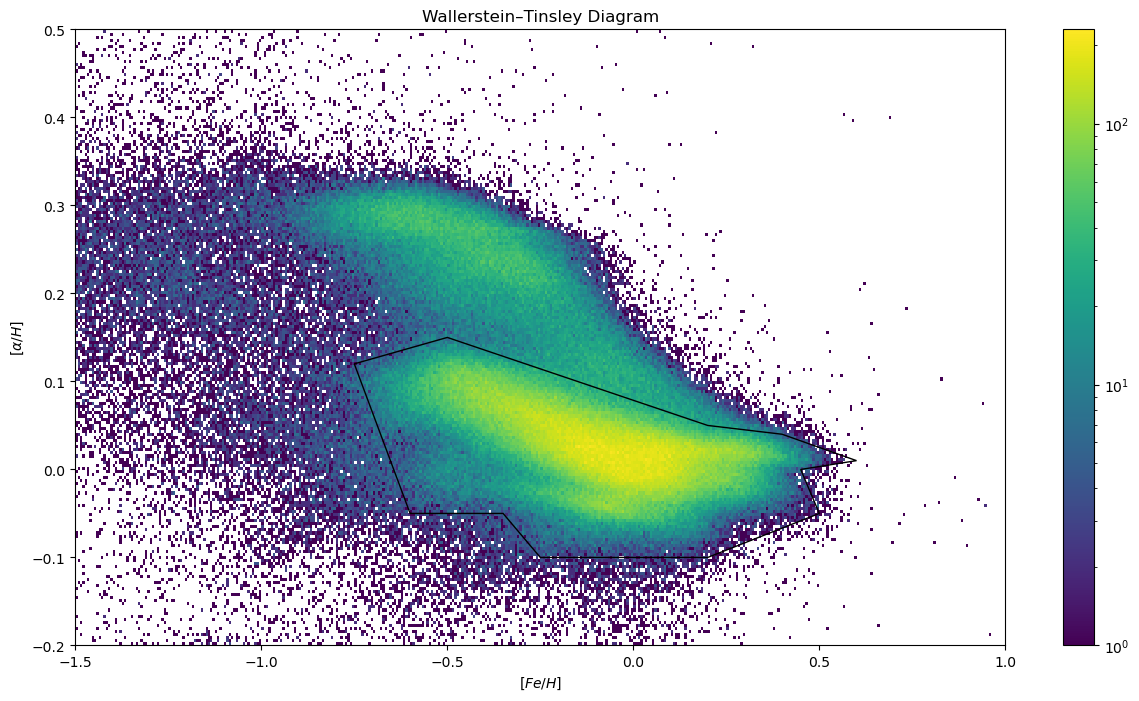

227.0

In [107]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.path import Path
import matplotlib.patches as patches


# A simple line
#thinDiskPath = Path([(-1.5, 0.26),(1.0, -0.02), (20.0,-100), (-20.0, -100), (-1.5, 0.25)], closed=True)

# Something more drawn
thinDiskPath = Path([(-0.75, 0.12),(-0.5, 0.15),(0.2, 0.05),(0.4, 0.04), (0.6, 0.01),(0.45,0.0),(0.5, -0.05),(0.2,-0.1), (-0.25, -0.1), (-0.35,-0.05), (-0.6, -0.05),(0,0)], closed = True)
#thinDiskPath = Path([(-1.5, 0.24), (1.0, -0.04), (20.0,-100), (-20.0, -100), (-1.5, 0.25)], closed=True)
thickDiskMask = thinDiskPath.contains_points(np.column_stack((feh_raw,alpham_raw)))
thinDiskMask = np.logical_not(thickDiskMask)


feh = np.ma.masked_array(feh_raw, mask=mask)
alpham = np.ma.masked_array(alpham_raw, mask = mask)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
plt.title("Wallerstein–Tinsley Diagram")
plt.xlabel("$[Fe/H]$")
plt.ylabel("$[\\alpha/H]$")

h, _, _, _= plt.hist2d(feh.compressed(), alpham.compressed(), bins=(400,200), range=((-1.5, 1),(-0.2, 0.5)), norm=colors.LogNorm(1,230))
plt.colorbar()

ax.add_patch(patches.PathPatch(thinDiskPath, fill=False))

plt.show()
np.max(h)




### Problem 1.3

Looking at the below two Wallerstein-Tinsley diagrams for Dwarf and Giant stars, the thin and thick disk are quite visible in the giant stars, but the thick disk is much less visible in the Dwarf stars

There's also this interesting break-up of the sub-structure of the thin disk between giants and dwarfs. Dwarf stars have the lower body and branch of the bird, and Giants have the upper body and the egg.
<Which galactic disks can you see for each of these two stellar populations?>

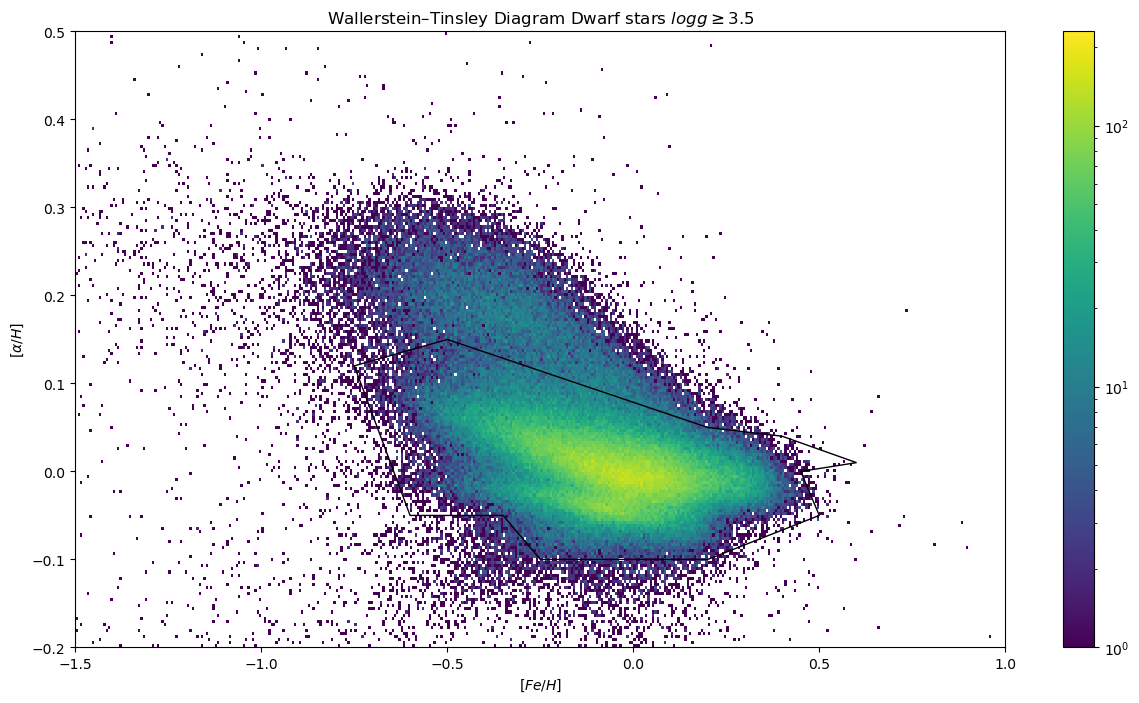

157.0

In [108]:
dwarf_mask = np.logical_or(mask, np.less(data['LOGG'], 3.5))

feh_dwarf = np.ma.masked_array(feh_raw, mask=dwarf_mask)
alpham_dwarf = np.ma.masked_array(alpham_raw, mask = dwarf_mask)

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
plt.title("Wallerstein–Tinsley Diagram Dwarf stars $log g \geq 3.5$")
plt.xlabel("$[Fe/H]$")
plt.ylabel("$[\\alpha/H]$")

h, _, _, _= plt.hist2d(feh_dwarf.compressed(), alpham_dwarf.compressed(), bins=(400,200), range=((-1.5, 1),(-0.2, 0.5)), norm=colors.LogNorm(1,230))
plt.colorbar()

ax.add_patch(patches.PathPatch(thinDiskPath, fill=False))

plt.show()
np.max(h)

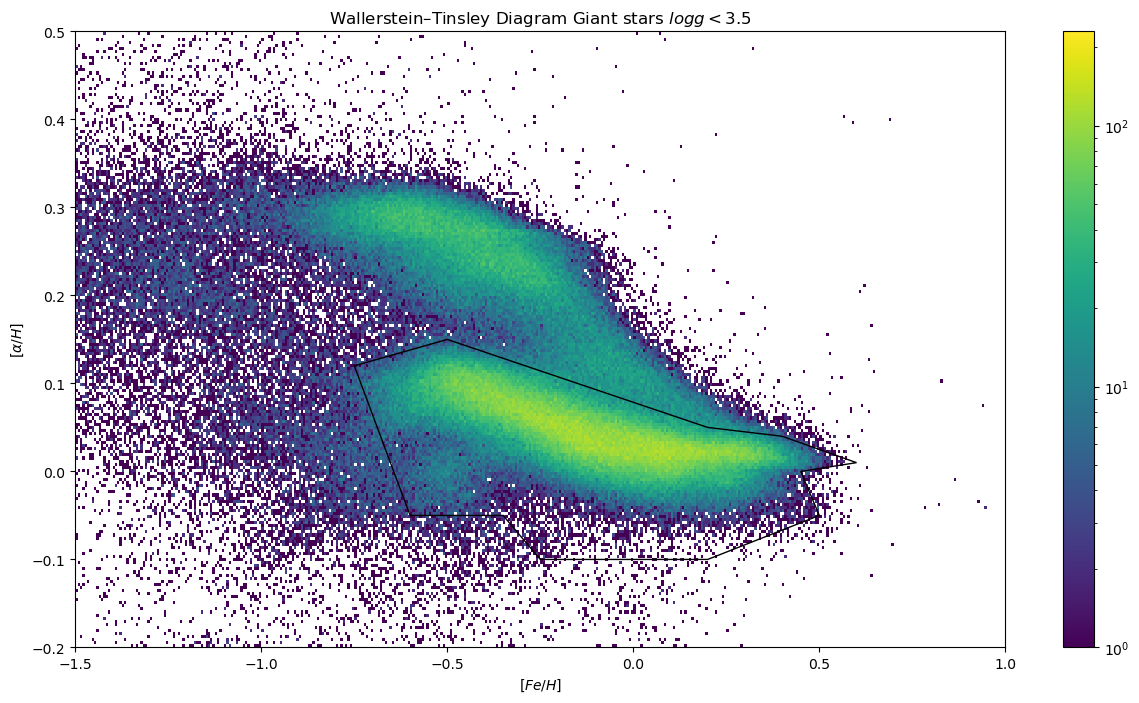

134.0

In [109]:
giant_mask = np.logical_or(mask, np.greater_equal(data['LOGG'], 3.5))

feh_giant = np.ma.masked_array(feh_raw, mask=giant_mask)
alpham_giant = np.ma.masked_array(alpham_raw, mask = giant_mask)


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
plt.title("Wallerstein–Tinsley Diagram Giant stars $log g < 3.5$")
plt.xlabel("$[Fe/H]$")
plt.ylabel("$[\\alpha/H]$")

h, _, _, _= plt.hist2d(feh_giant.compressed(), alpham_giant.compressed(), bins=(400,200), range=((-1.5, 1),(-0.2, 0.5)), norm=colors.LogNorm(1,230))
plt.colorbar()

ax.add_patch(patches.PathPatch(thinDiskPath, fill=False))

plt.show()
np.max(h)

In [ ]:
### Problem 2.1

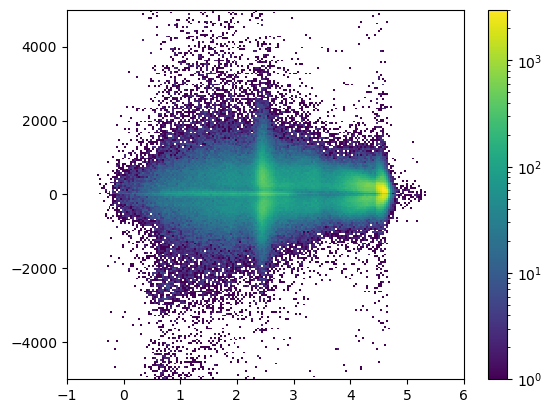

3159.0

In [111]:
import astropy.coordinates as coords
import astropy.units as u


plotmask = np.logical_or(mask, thinDiskMask)

ra = np.ma.masked_array(data['RA'], mask = plotmask)
dec = np.ma.masked_array(data['DEC'], mask = plotmask)
distance = np.ma.masked_array(data['GAIAEDR3_R_MED_GEO'], mask = plotmask)
logg = np.ma.masked_array(data['LOGG'], mask = plotmask)


sky_coords = coords.SkyCoord(ra = ra.compressed() * u.deg, dec = dec.compressed() * u.deg, distance=distance.compressed() * u.pc)
xyz_coords = sky_coords.transform_to(coords.Galactocentric)

h, _ , _ , _ = plt.hist2d(logg.compressed(), xyz_coords.z.value, bins = (200,200), range = ((-1,6),(-5000, 5000)), norm=colors.LogNorm(1,3000))
plt.colorbar()
plt.show()
h.max()

#xyz_thick = np.ma.masked_array(xyz_coords, mask=np.logical_or(mask, thickDiskMask))
#xyz_thin = np.ma.masked_array(xyz_coords, mask=np.logical_or(mask, thinDiskMask))
